In [1]:
%pwd

u'/Users/christophereppig/DSI_week3'

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
# or import matplotlib.pyplot as plt
from sklearn import datasets


In [6]:
data = datasets.load_boston()

In [7]:
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
print data.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
type(data)

sklearn.datasets.base.Bunch

In [10]:
print data.data[0]

[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]


In [12]:
print data.target[0]
# target contains the house value data

24.0


In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
targets = pd.DataFrame(data.target, columns=['MEDV'])

In [16]:
targets

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [18]:
import statsmodels.api as sm

In [19]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [22]:
targets['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [23]:
x = df['RM']
y = targets['MEDV']


In [25]:
model = sm.OLS(y, x).fit()

In [26]:
model

In [28]:
predictions = model.predict(x)

In [30]:
model.predict([4])

array([ 14.6134016])

In [31]:
model.predict([10])

array([ 36.533504])

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          3.74e-256
Time:                        15:00:15   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000         3.548     3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

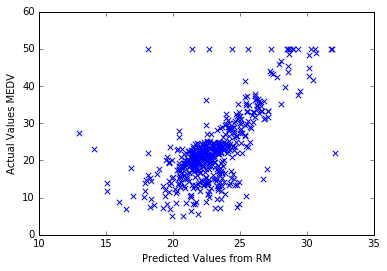

In [53]:
plt.scatter(predictions, y, s=30, c='b', marker='x', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

In [57]:
x = df['RM']
x = sm.add_constant(x) ## adds a constant to x
y = targets['MEDV']

In [58]:
x.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [60]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.49e-74
Time:                        15:14:31   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

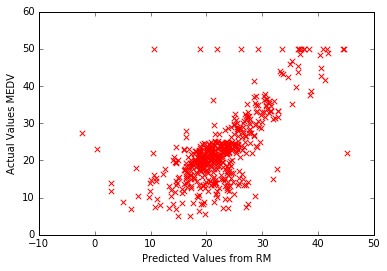

In [63]:
plt.scatter(predictions, y, s=30, c='r', marker='x', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

In [65]:
## intercept is zero

x = df[["RM", "LSTAT"]]
y = targets['MEDV']
x.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [69]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:25:20   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000         4.769     5.045
LSTAT         -0.6557      0.031    -21.458      0.000        -0.716    -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

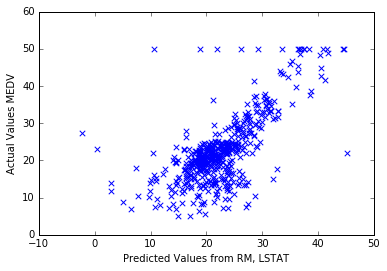

In [70]:
plt.scatter(predictions, y, s=30, c='b', marker='x', zorder=10)
plt.xlabel("Predicted Values from RM, LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()

In [71]:
x = df[["RM", "LSTAT"]]
x = sm.add_constant(x)  ## tells it to add a constant (y-intercept)
y = targets['MEDV']
x.head()

,const,RM,LSTAT
0,1,6.575,4.98
1,1,6.421,9.14
2,1,7.185,4.03
3,1,6.998,2.94
4,1,7.147,5.33


In [85]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          6.95e-135
Time:                        15:35:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

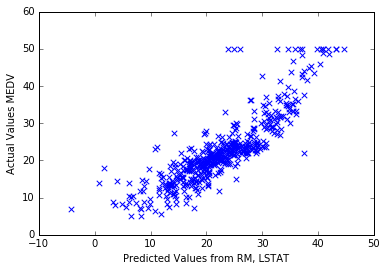

In [86]:
plt.scatter(predictions, y, s=30, c='b', marker='x', zorder=10)
plt.xlabel("Predicted Values from RM, LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()

In [93]:
x = df
y = targets['MEDV']
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [94]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:37:12   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008        -0.159    -0.024
ZN             0.0487      0.014      3.379      0.001         0.020     0.077
INDUS         -0.0038      0.064     -0.059      0.953        -0.130     0.123
CHAS           2.8564      0.904      3.160      0.002         1.080     4.633
NOX           -2.8808      3.359     -0.858      0.392        -9.481     3.720
RM             5.9252      0.309     19.168      0.000         5.318     6.533
AGE           -0.0072      0.014     -0.523      0.601        -0.034     0.020
DIS           -0.9680      0.196     -4.947      0.000        -1.352    -0.584
RAD            0.1704      0.067      2.554      0.011         0.039     0.302
TAX           -0.0094      0.004     -2.393      0.017        -0.017    -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000        -0.608    -0.177
B              0.0150      0.003      5.561      0.000         0.010     0.020
LSTAT         -0.4170      0.051     -8.214      0.000        -0.517    -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

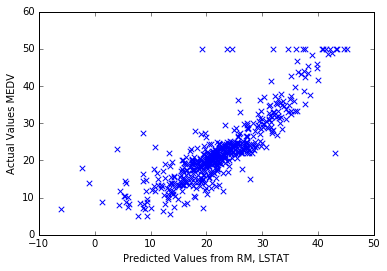

In [95]:
plt.scatter(predictions, y, s=30, c='b', marker='x', zorder=10)
plt.xlabel("Predicted Values from RM, LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()

In [96]:
x = df
x = sm.add_constant(x)
y = targets['MEDV']
x.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [97]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          6.95e-135
Time:                        15:37:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

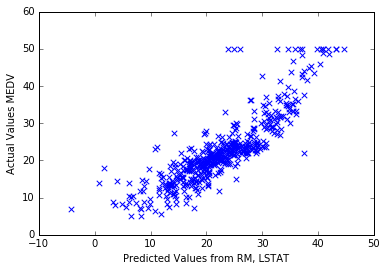

MSE:  2433.53993314


In [98]:
plt.scatter(predictions, y, s=30, c='b', marker='x', zorder=10)
plt.xlabel("Predicted Values from RM, LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE: ", model.mse_model

In [99]:
import patsy

In [100]:
df["MEDV"] = targets['MEDV']


In [105]:

y, x = patsy.dmatrices("MEDV ~ RM + LSTAT", data=df)



In [106]:
print x[0:5, :]


[[ 1.     6.575  4.98 ]
 [ 1.     6.421  9.14 ]
 [ 1.     7.185  4.03 ]
 [ 1.     6.998  2.94 ]
 [ 1.     7.147  5.33 ]]


In [107]:
print y[0:5, :]

[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


In [110]:
y, x = patsy.dmatrices("MEDV ~ RM + I(LSTAT**2)", data=df)
print x[0:5, :]
print y[0:5, :]

[[  1.       6.575   24.8004]
 [  1.       6.421   83.5396]
 [  1.       7.185   16.2409]
 [  1.       6.998    8.6436]
 [  1.       7.147   28.4089]]
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


In [112]:
y, x = patsy.dmatrices("MEDV ~ CRIM + INDUS", data=df)

In [113]:
crime_indus_model = sm.OLS(y, x).fit()

In [114]:
predictions_cim = crime_indus_model.predict(x)

In [115]:
crime_indus_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     96.47
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           3.45e-36
Time:                        16:11:45   Log-Likelihood:                -1758.1
No. Observations:                 506   AIC:                             3522.
Df Residuals:                     503   BIC:                             3535.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     29.2560      0.671     43.618      0.000        27.938    30.574
CRIM          -0.2433      0.044     -5.486      0.000        -0.330    -0.156
INDUS         -0.5252      0.056     -9.452      0.000        -0.634    -0.416
==============================================================================
Omnibus:                      193.507   Durbin-Watson:                   0.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.456
Skew:                           1.798   Prob(JB):                    2.09e-142
Kurtosis:                       7.244   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

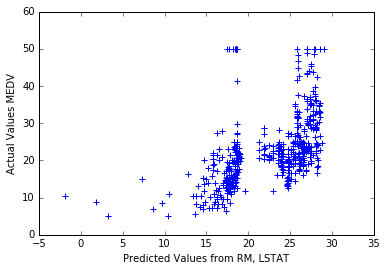

MSE:  5921.17051979


In [119]:
plt.scatter(predictions_cim, y, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM, LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE: ", crime_indus_model.mse_model

In [131]:
y, x = patsy.dmatrices("MEDV ~ AGE + CHAS", data=df)
age_crime_model = sm.OLS(y, x).fit()
predictions_acm = age_crime_model.predict(x)
age_crime_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     57.33
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           3.73e-23
Time:                        16:20:56   Log-Likelihood:                -1788.3
No. Observations:                 506   AIC:                             3583.
Df Residuals:                     503   BIC:                             3595.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     30.8601      0.975     31.662      0.000        28.945    32.775
AGE           -0.1291      0.013     -9.782      0.000        -0.155    -0.103
CHAS           7.5838      1.462      5.186      0.000         4.711    10.457
==============================================================================
Omnibus:                      161.230   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.990
Skew:                           1.612   Prob(JB):                     4.20e-89
Kurtosis:                       5.984   Cond. No.                         293.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

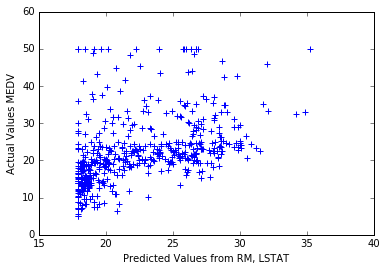

MSE:  3964.75577486


In [130]:
plt.scatter(predictions_acm, y, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM, LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE: ", age_crime_model.mse_model

In [132]:
y, x = patsy.dmatrices("MEDV ~ LSTAT + RM + PTRATIO", data=df)
medvBest = sm.OLS(y, x).fit()
medvBestPredict = medvBest.predict(x)
medvBest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          2.69e-123
Time:                        16:24:43   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.000        10.879    26.255
LSTAT         -0.5718      0.042    -13.540      0.000        -0.655    -0.489
RM             4.5154      0.426     10.603      0.000         3.679     5.352
PTRATIO       -0.9307      0.118     -7.911      0.000        -1.162    -0.700
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
print "MSE: ", medvBest.mse_model

MSE:  9662.77003374


In [134]:
y, x = patsy.dmatrices("MEDV ~ LSTAT + RM", data=df)
medvBest2 = sm.OLS(y, x).fit()
medvBestPredict2 = medvBest2.predict(x)
medvBest2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          7.01e-112
Time:                        16:26:28   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669        -7.592     4.875
LSTAT         -0.6424      0.044    -14.689      0.000        -0.728    -0.556
RM             5.0948      0.444     11.463      0.000         4.222     5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
print "MSE: ", medvBest2.mse_model

MSE:  13638.4931069


In [136]:
y, x = patsy.dmatrices("MEDV ~ LSTAT + RM + PTRATIO + TAX", data=df)
medvBest3 = sm.OLS(y, x).fit()
medvBestPredict3 = medvBest3.predict(x)
medvBest3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     265.7
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          2.45e-122
Time:                        16:28:06   Log-Likelihood:                -1552.2
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     501   BIC:                             3136.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.6745      3.973      4.449      0.000         9.869    25.480
LSTAT         -0.5451      0.047    -11.567      0.000        -0.638    -0.452
RM             4.5861      0.429     10.685      0.000         3.743     5.429
PTRATIO       -0.8752      0.125     -6.980      0.000        -1.122    -0.629
TAX           -0.0022      0.002     -1.274      0.203        -0.006     0.001
==============================================================================
Omnibus:                      220.214   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1252.079
Skew:                           1.834   Prob(JB):                    1.30e-272
Kurtosis:                       9.777   Cond. No.                     7.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
print "MSE: ", medvBest3.mse_model

MSE:  7258.1675753


In [145]:
y, x = patsy.dmatrices("MEDV ~ LSTAT + RM + PTRATIO + CRIM", data=df)
medvBest4 = sm.OLS(y, x).fit()
medvBestPredict4 = medvBest4.predict(x)
medvBest4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     267.8
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          6.39e-123
Time:                        16:34:10   Log-Likelihood:                -1550.9
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     16.9939      3.973      4.277      0.000         9.188    24.799
LSTAT         -0.5356      0.046    -11.761      0.000        -0.625    -0.446
RM             4.6126      0.427     10.802      0.000         3.774     5.452
PTRATIO       -0.8909      0.119     -7.498      0.000        -1.124    -0.657
CRIM          -0.0640      0.031     -2.081      0.038        -0.124    -0.004
==============================================================================
Omnibus:                      219.361   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1213.591
Skew:                           1.837   Prob(JB):                    2.96e-264
Kurtosis:                       9.638   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
print "MSE: ", medvBest4.mse_model

MSE:  7276.48046685


In [151]:
y, x = patsy.dmatrices("MEDV ~ LSTAT + RM + TAX + NOX + B + RAD + DIS + CHAS + ZN", data=df)
medvBest5 = sm.OLS(y, x).fit()
medvBestPredict5 = medvBest5.predict(x)
medvBest5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     133.1
Date:                Wed, 12 Oct 2016   Prob (F-statistic):          3.18e-126
Time:                        14:47:51   Log-Likelihood:                -1529.5
No. Observations:                 506   AIC:                             3079.
Df Residuals:                     496   BIC:                             3121.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.3904      4.306      3.110      0.002         4.930    21.851
LSTAT         -0.5769      0.049    -11.669      0.000        -0.674    -0.480
RM             4.3057      0.425     10.130      0.000         3.471     5.141
TAX           -0.0152      0.004     -4.293      0.000        -0.022    -0.008
NOX           -8.8802      3.567     -2.489      0.013       -15.889    -1.871
B              0.0096      0.003      3.408      0.001         0.004     0.015
RAD            0.1710      0.064      2.690      0.007         0.046     0.296
DIS           -1.4877      0.195     -7.618      0.000        -1.871    -1.104
CHAS           3.3443      0.902      3.709      0.000         1.573     5.116
ZN             0.0756      0.013      5.645      0.000         0.049     0.102
==============================================================================
Omnibus:                      151.608   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.991
Skew:                           1.325   Prob(JB):                    1.39e-125
Kurtosis:                       7.500   Cond. No.                     1.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
print "MSE: ", medvBest5.mse_model

MSE:  2875.75945693


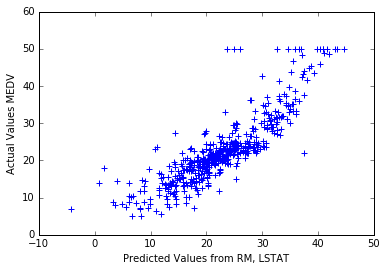

In [150]:
plt.scatter(medvBestPredict5, y, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM, LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
